# Implementing BSRmerge

In [1]:
cd ~/Desktop/Repositories/Bioanalysis/bioreactor_results

C:\Users\agilman\Desktop\Repositories\Bioanalysis\bioreactor_results


In [2]:
%run ./BSRmerge.py

In [3]:
cd ~/Desktop/DataSamples/Vicell Flex dev

C:\Users\agilman\Desktop\DataSamples\Vicell Flex dev


In [4]:
D_df = vicell_convert_xlsx()
vicell_check_format(D_df)
D_df = vicell_clean(D_df)
df_vcl = vicell_merge_convert(D_df)

####   ViCell Import Report ####


Total number of .xlsx files in dir: 2
List of .xlsx files: ['BSR5.xlsx', 'R0015.xlsx']


Converting excel files into DataFrames: 
BSR5.xlsx: CONVERTED
R0015.xlsx: CONVERTED


#### ViCell Format Report ####


Total files to verify: ['BSR5.xlsx', 'R0015.xlsx']
BSR5.xlsx: CONFIRMED
R0015.xlsx: CONFIRMED


#### ViCell Data Cleaning Report ####


BSR5.xlsx-------- Data Cleaning Complete
All Sample ID's match File name
All samples are of type: CHO
R0015.xlsx-------- Data Cleaning Complete
All Sample ID's match File name
All samples are of type: CHO


#### ViCell Data Merge Report ####


Sample date range: 2019-11-01 - 2019-11-21
Unique sample ID's: ['R0015' 'R0018' 'R0017' 'R0016']
Total number of samples: 59


In [5]:
D_flx = flex_convert_csv()
D_flx = flex_check_format(D_flx)
df_flx = flex_merge(D_flx)

####   FlEX Import Report ####


Total number of .csv files in dir: 2
List of .csv files: ['SampleResults2019-11-13_103509.csv', 'SampleResults2019-11-21_143948.csv']


Converting .csv files into DataFrames: 
SampleResults2019-11-13_103509.csv: CONVERTED
SampleResults2019-11-21_143948.csv: CONVERTED


#### FLEX Format Report ####


Total files to verify: ['SampleResults2019-11-13_103509.csv', 'SampleResults2019-11-21_143948.csv']


SampleResults2019-11-13_103509.csv----------Converted Succesfully
Accpeted unique sample IDs: ['R0011' 'R0012' 'R0013' 'R0014' 'R0015' 'R0018' 'R0017' 'R0016'
 'r15 GLUC']
Rejected unique sample IDs: ['CDCIM' 'BATCHING CDCIM R16' 'BATCHING CDCIM R17' 'BATCHING CDCIM R18']


SampleResults2019-11-21_143948.csv----------Converted Succesfully
Accpeted unique sample IDs: ['R0015' 'R0018' 'R0017' 'R0016' 'r15 GLUC' 'r16 GLUC']
Rejected unique sample IDs: ['CDCIM' 'BATCHING CDCIM R16' 'BATCHING CDCIM R17' 'BATCHING CDCIM R18']




#### FLEX Data Merge Report ####



In [6]:
#OPTIONAL creating a dictionary to change all in list into key
dict_change = {"R0015 Gluc":["r15 GLUC"],
              "R0016 Gluc":["r16 GLUC"]}
df_flx = rename_flex_sample_id(dict_change, df_flx)

In [7]:
merged = merge_vcl_flx(df_vcl, df_flx)
merged = calc_runtime(merged)

#### Merge Report ####


Unique sample IDs: ['R0015' 'R0018' 'R0017' 'R0016' 'R0011' 'R0012' 'R0013' 'R0014']
Total number of rows: 107


In [8]:
cd ~/Desktop/Repositories/Bioanalysis/bioreactor_results

C:\Users\agilman\Desktop\Repositories\Bioanalysis\bioreactor_results


In [9]:
%run ./BSRplots.py

In [10]:
df = merged
df = calc_qp(df)

In [12]:
df['Sample ID'].unique()

array(['R0011', 'R0012', 'R0013', 'R0014', 'R0015', 'R0018', 'R0017',
       'R0016'], dtype=object)

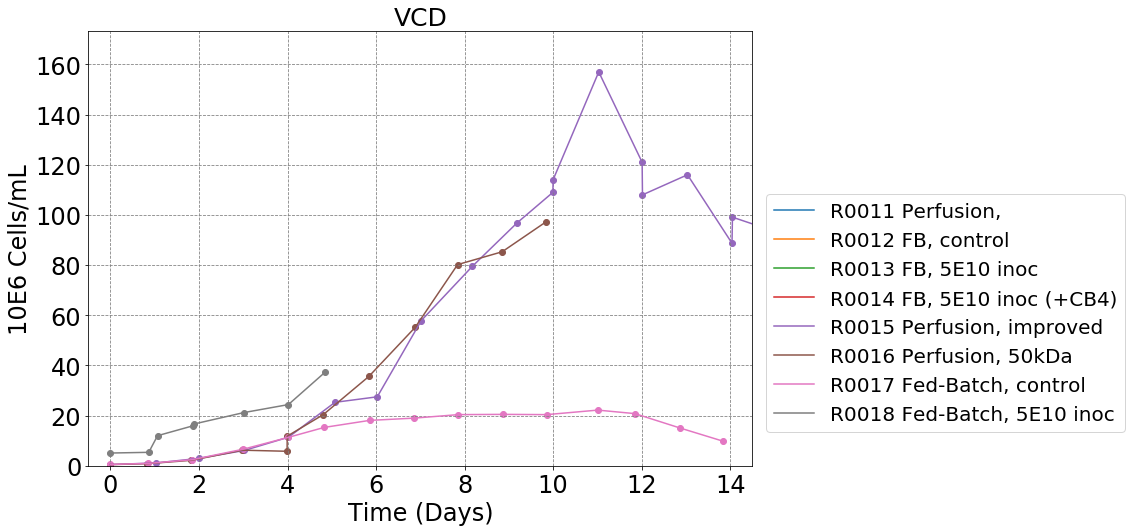

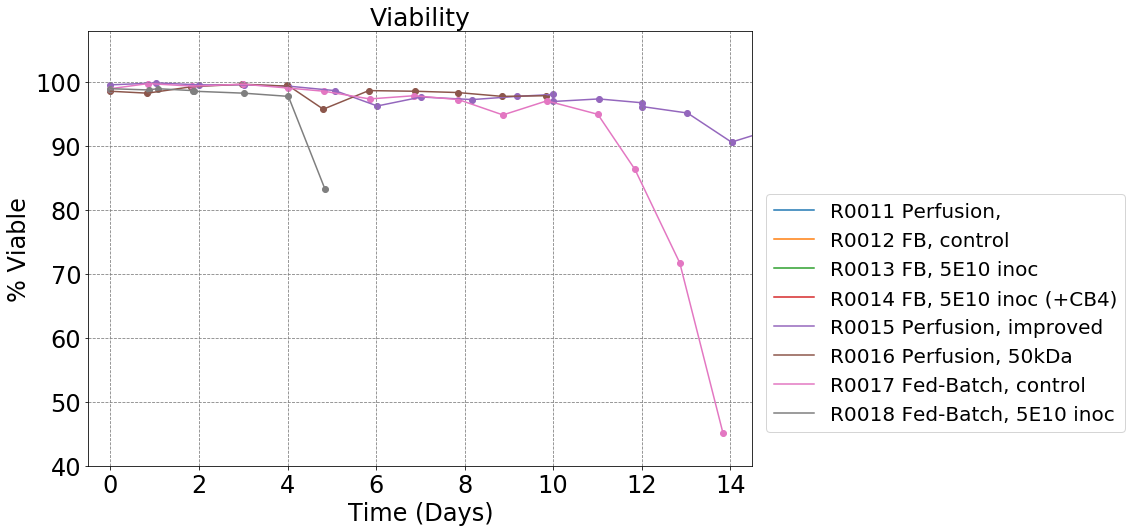

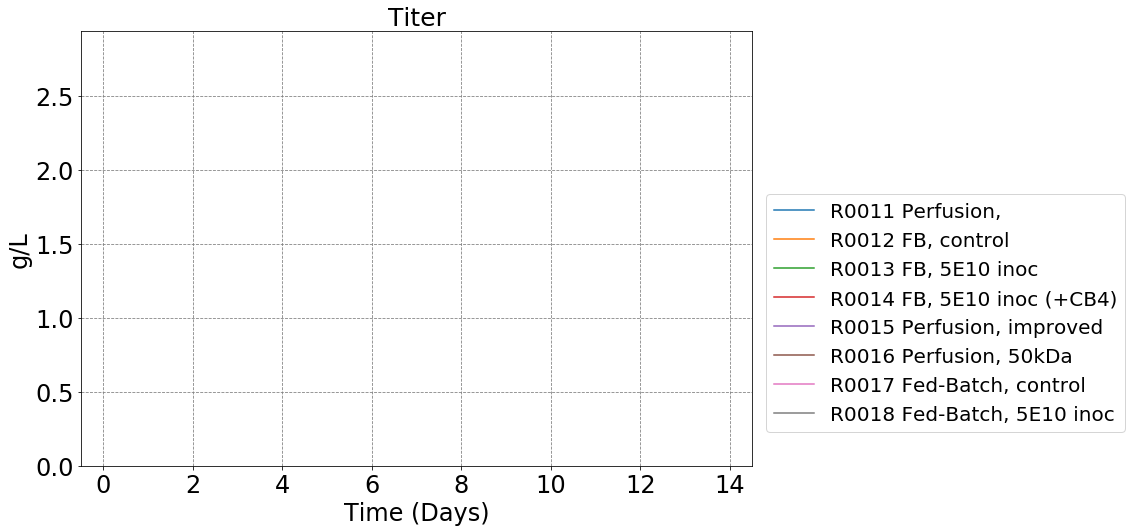

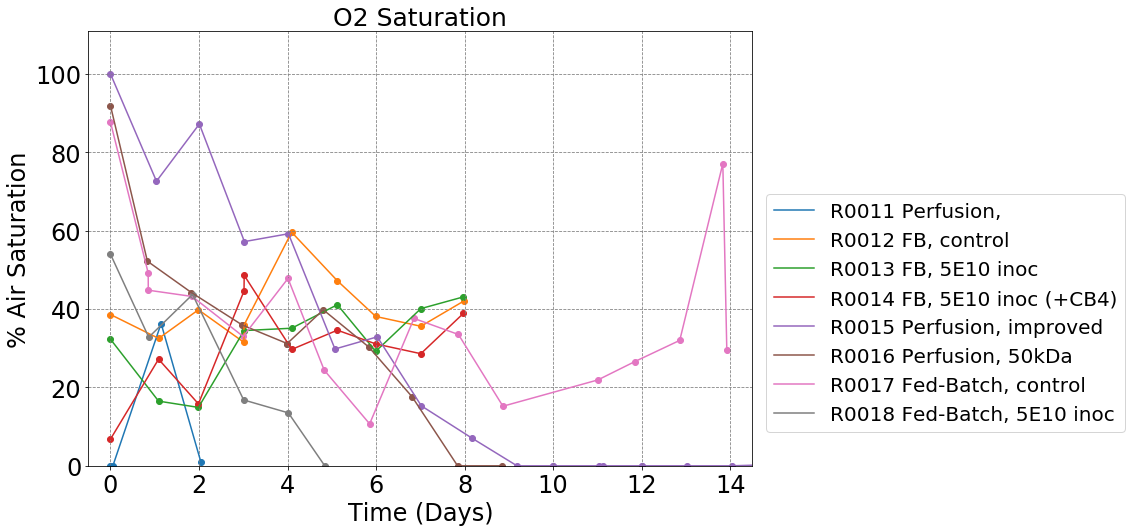

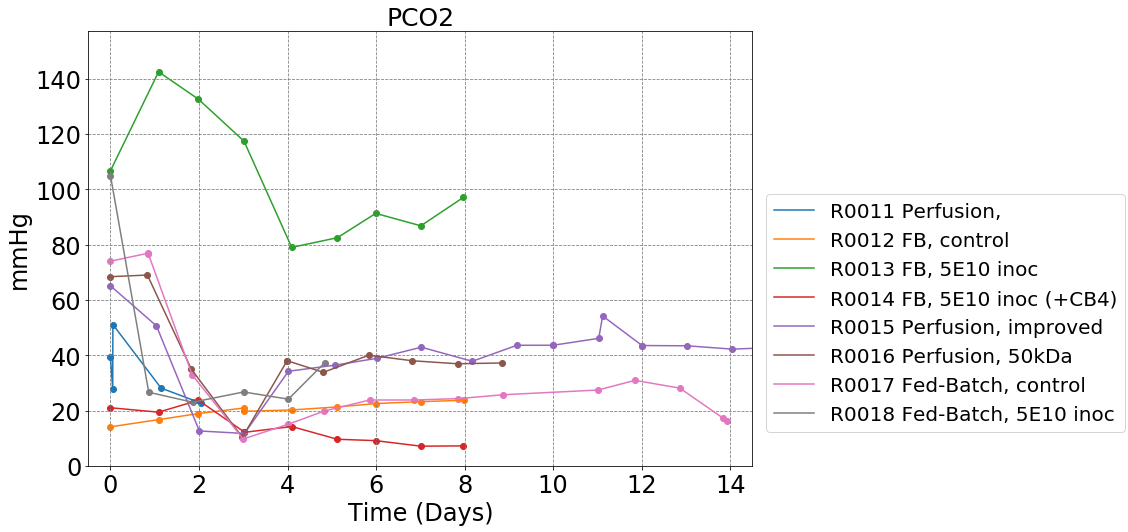

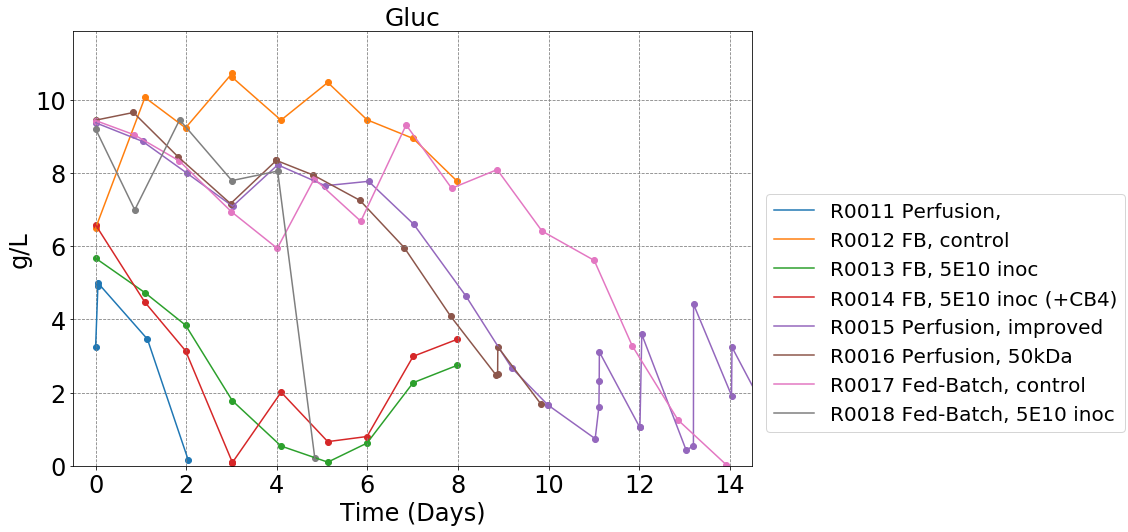

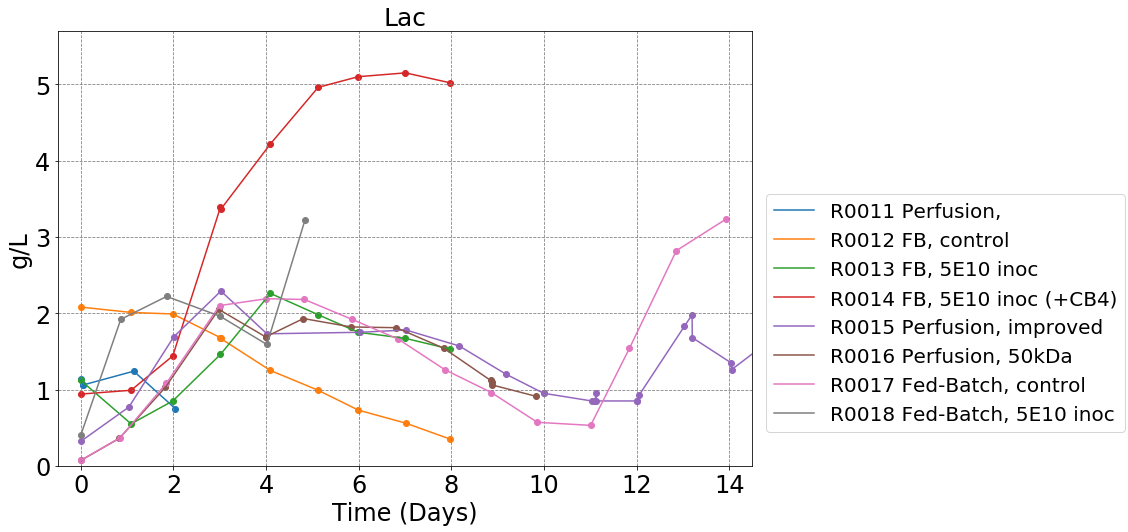

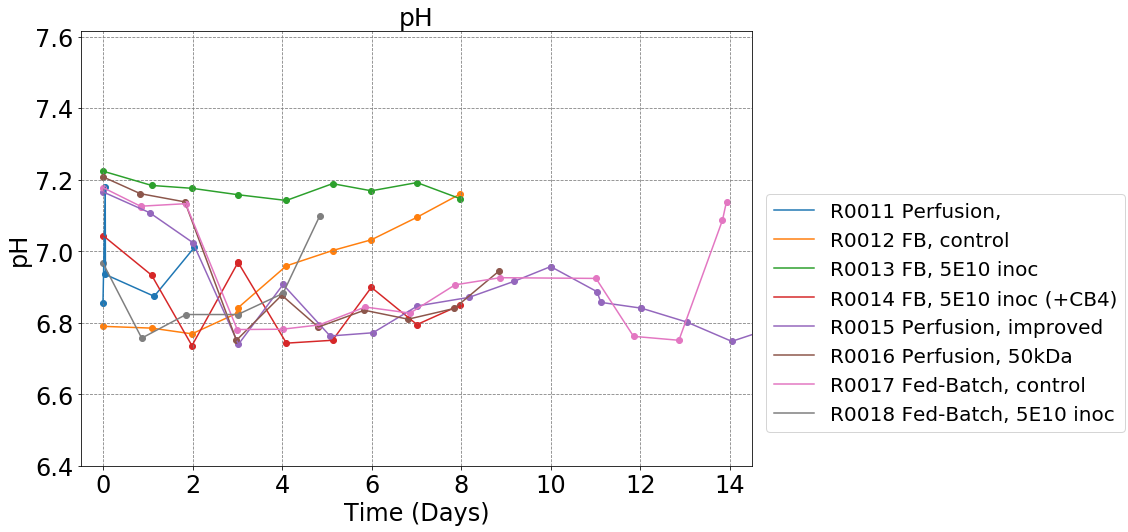

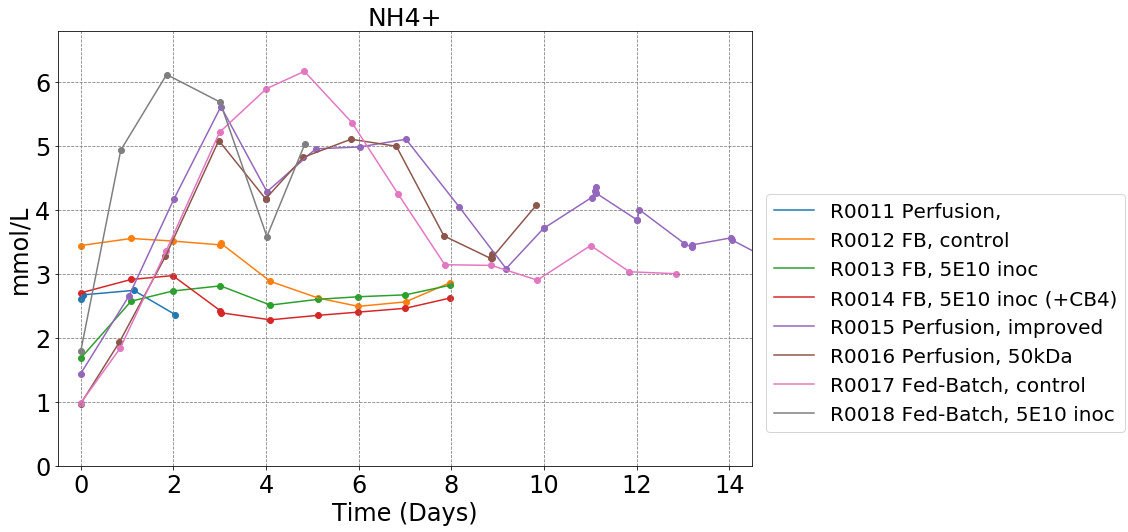

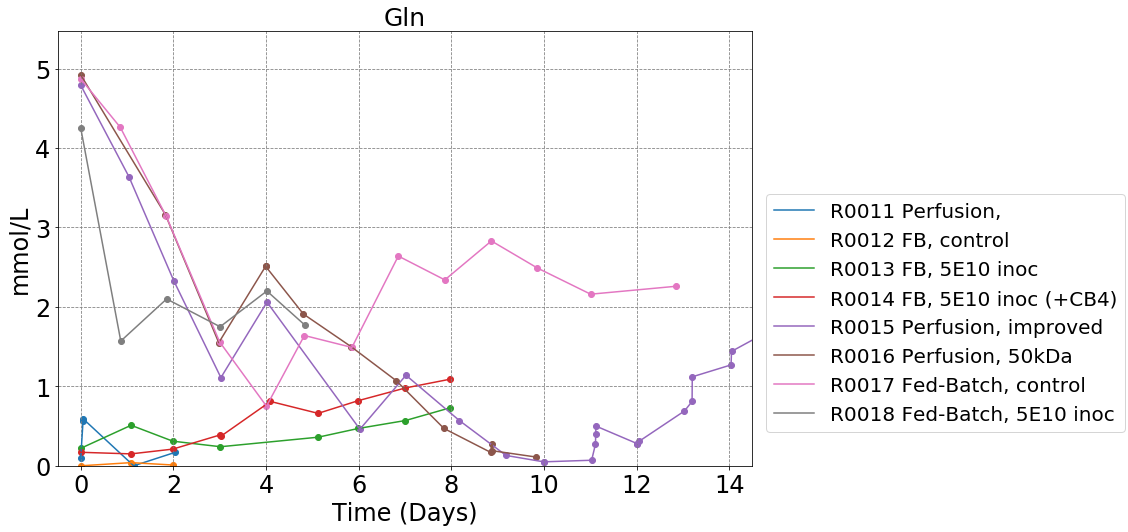

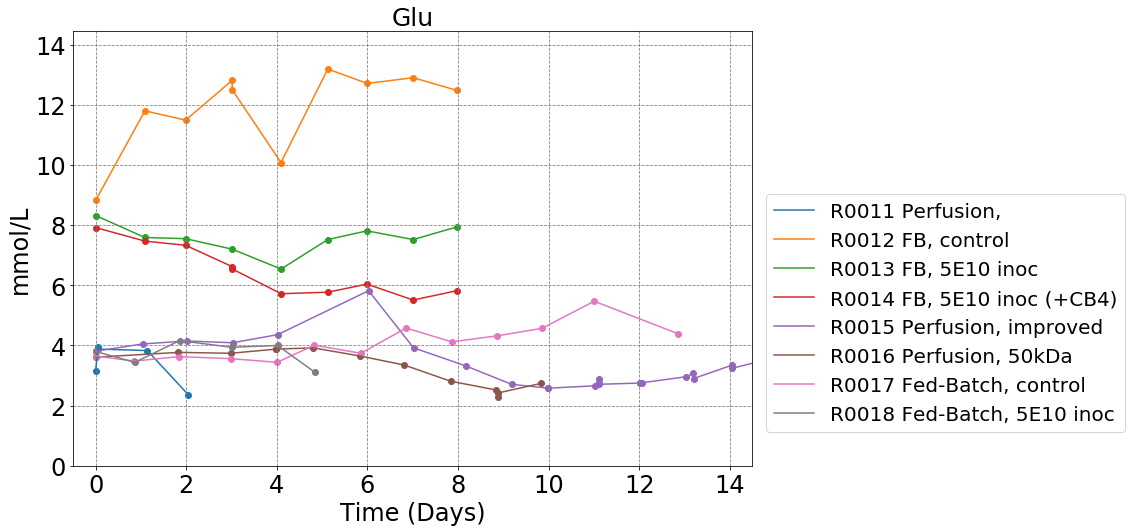

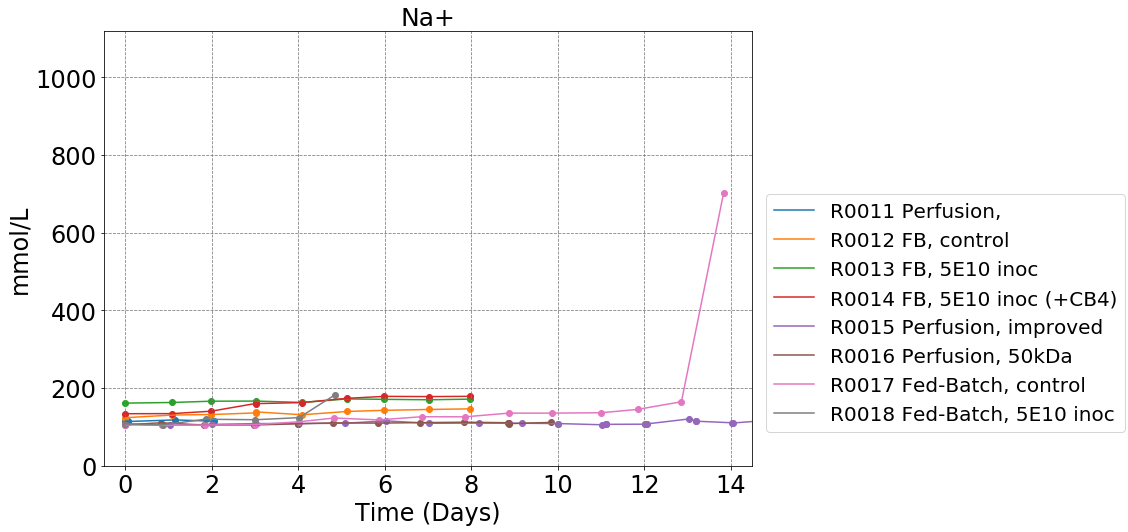

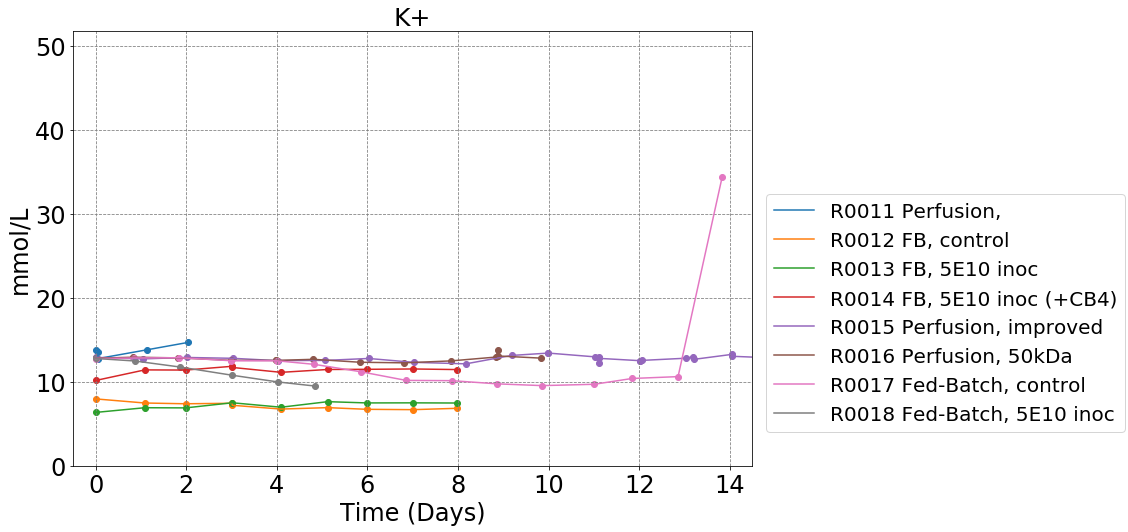

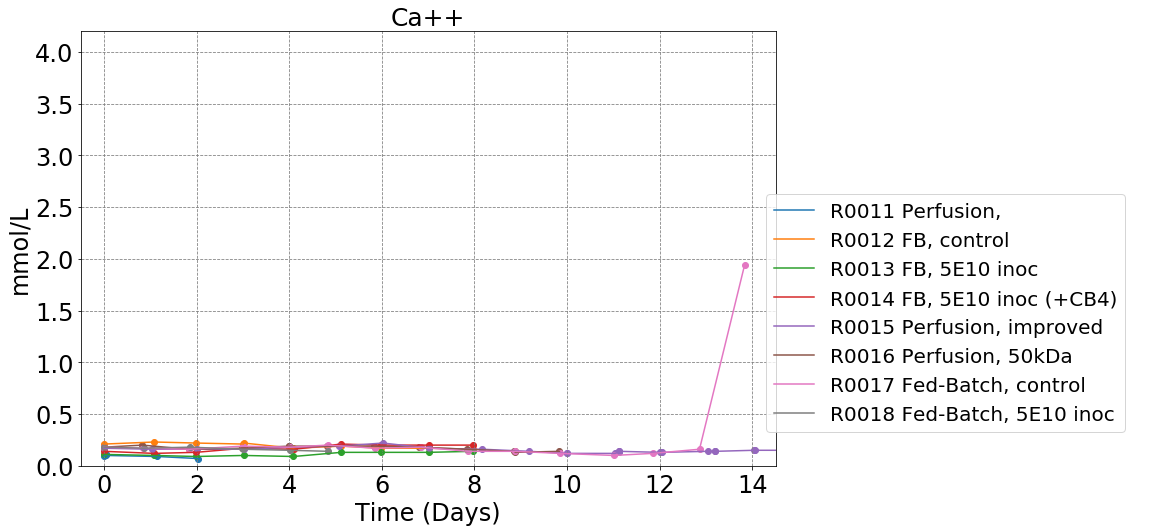

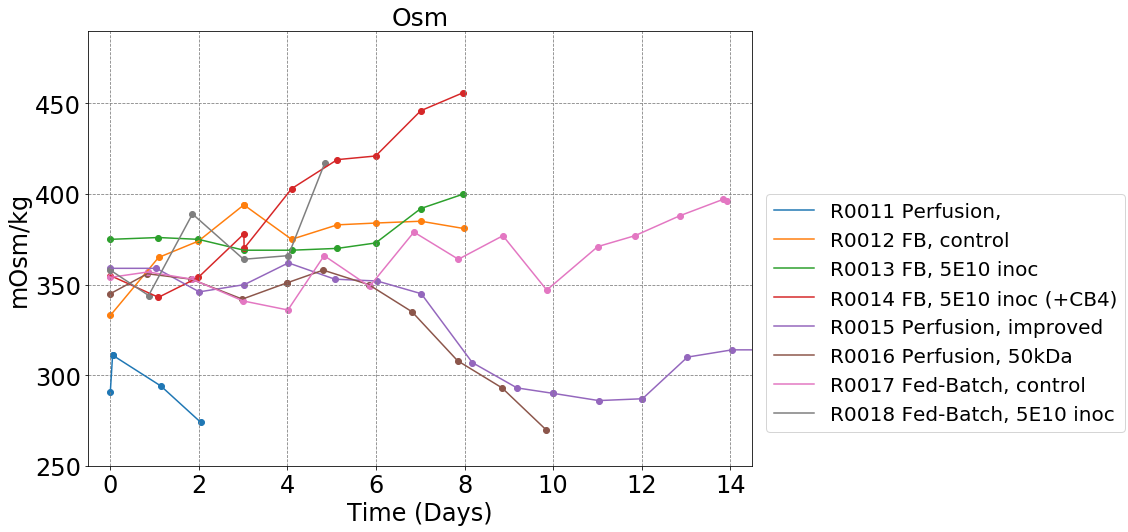

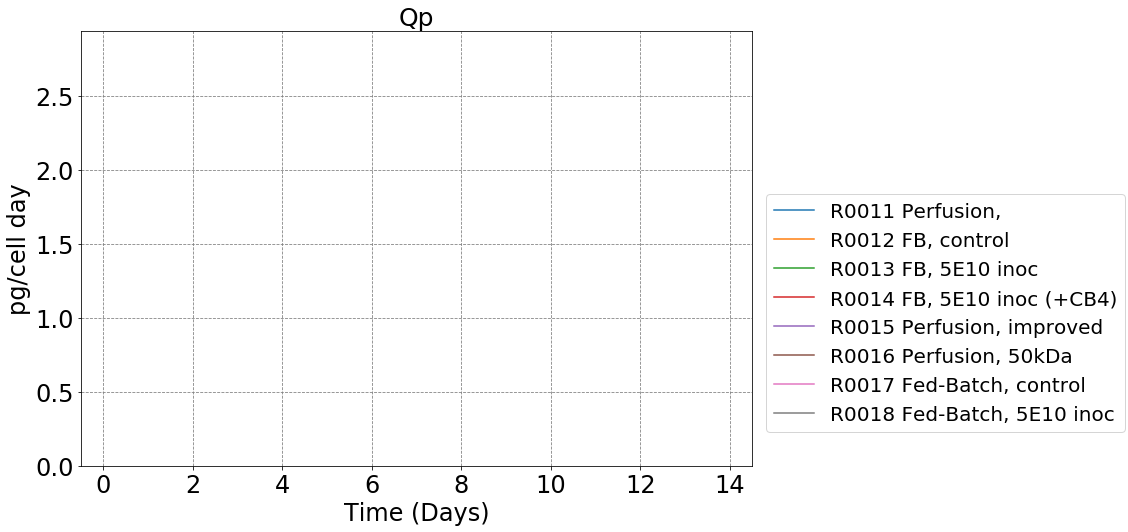

In [13]:
list_BSR = ['R0011', 'R0012', 'R0013', 'R0014', 'R0015', 'R0018', 'R0017',
       'R0016']

#Optional cell to run, adjusting legend labels
lgnd = {"R0007":"Perfusion", "R0008":"Perfusion, initial",
        "R0009":"Fed-Batch", "R0010":"Fed-Batch",
        "R0011":"Perfusion,", "R0012":"FB, control",
        "R0013": "FB, 5E10 inoc", "R0014": "FB, 5E10 inoc (+CB4)",
        "R0015": "Perfusion, improved", "R0016":"Perfusion, 50kDa",
       "R0017":"Fed-Batch, control", "R0018":"Fed-Batch, 5E10 inoc"}

clms_list = ['VCD', 'Viability', 'Titer', 'O2 Saturation', 'PCO2', 'Gluc', 'Lac', 'pH','NH4+','Gln', 'Glu',
        'Na+', 'K+', 'Ca++', "Osm", 'Qp']

for i in clms_list:
    plot_single(list_BSR, i, df, legend = lgnd)